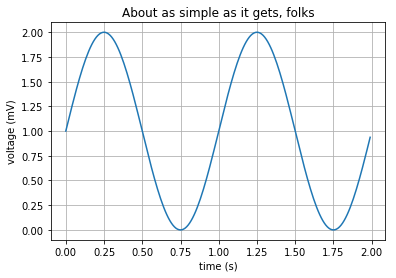

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

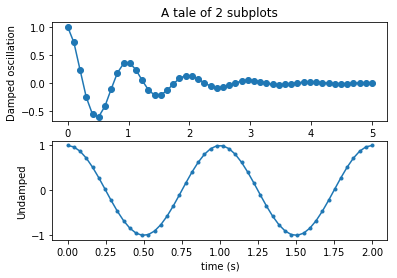

In [7]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

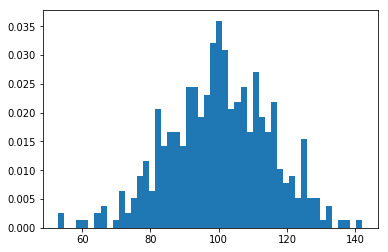

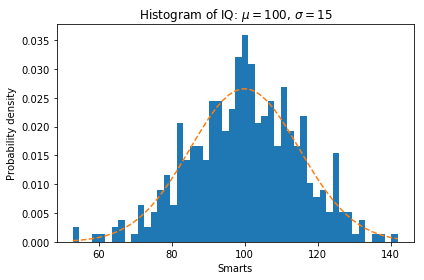

In [6]:
import matplotlib.mlab as mlab

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

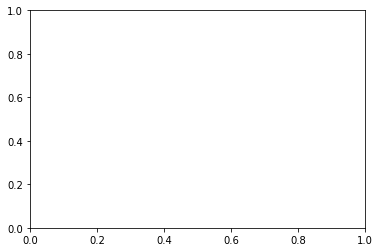

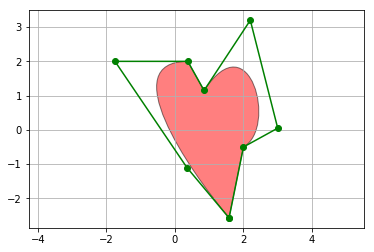

In [9]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

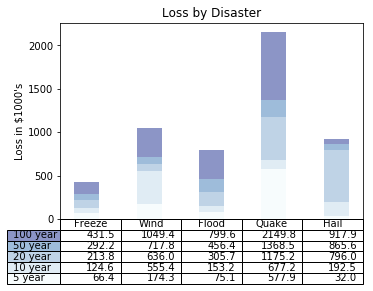

In [10]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [12]:
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andyxie/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/goog.npz'

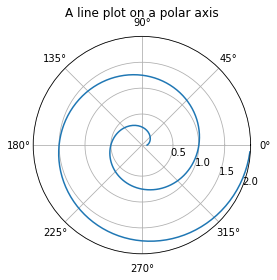

In [13]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

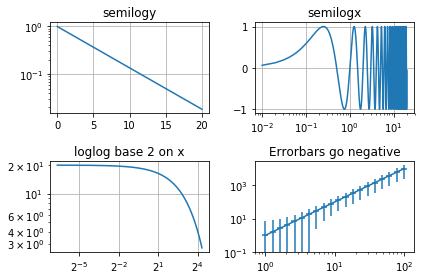

In [14]:
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(ymin=0.1)

fig.tight_layout()
plt.show()

In [15]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)
# Matplotlib works better with datetime.datetime than np.datetime64, but the
# latter is more portable.
date = r.date.astype('O')

fig, ax = plt.subplots()
ax.plot(date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(date.min().year, 1, 1)
datemax = datetime.date(date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andyxie/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/goog.npz'